In [9]:
import pandas as pd

In [14]:
df1 = pd.read_csv('D:/chatbot_please/FINAL_AHA_data.csv')
df2 = pd.read_csv('D:/chatbot_please/FINAL_AIHUB_data.csv')

df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(df)

                                                Question  \
0                                           경제 관련 궁금합니다.   
1                                        경제 관련 질문이 있습니다.   
2                                        경제 용어 관련 질문입니다.   
3                                            경제관련 질문입니다.   
4      경제를 공부하고 있는 사람입니다 우리나라는 대기업에서 많은 돈을 벌어서 국가에 세금...   
...                                                  ...   
97863  공모주 관련해서 증권발행실적보고서라는 것도 있던데 이 보고서에는 어떤 정보들을 얻을...   
97864  공모주 청약 여부 결정할 때 의무보유확약도 확인해보라고 하던데 의무보유확약은 어떤 ...   
97865             그럼 이 의무보유확약 기간이 공모주 주가에 어떤 영향을 미치는 거야?   
97866  의무보유확약 정보도 필수로 확인해야겠네. 아까 설명해준 증권발행실적보고서에도 의무보...   
97867              공모주 청약 결정하기 전에 증권발행실적보고서부터 먼저 훑어봐야겠네.   

                                                  Answer  
0      물가가 상승하게 되면 돈의 가치가 떨어지게 됩니다. 이로 인해 사람들은 동일한 상품...  
1      인플레이션은 쉽게 말해 물가 상승을 의미합니다. 이는 특정 기간 동안 상품 및 서비...  
2      소비자 물가지수는 한 나라의 경제 상황을 판단하는 지표 중 하나로 일반 소비자가 일...  
3      GDP란 Gross Dimestic Product의 약자이며 국내

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

Question 열 길이 통계:
평균 길이: 31.55
최대 길이: 80
최소 길이: 5

Answer 열 길이 통계:
평균 길이: 101.46
최대 길이: 250
최소 길이: 5


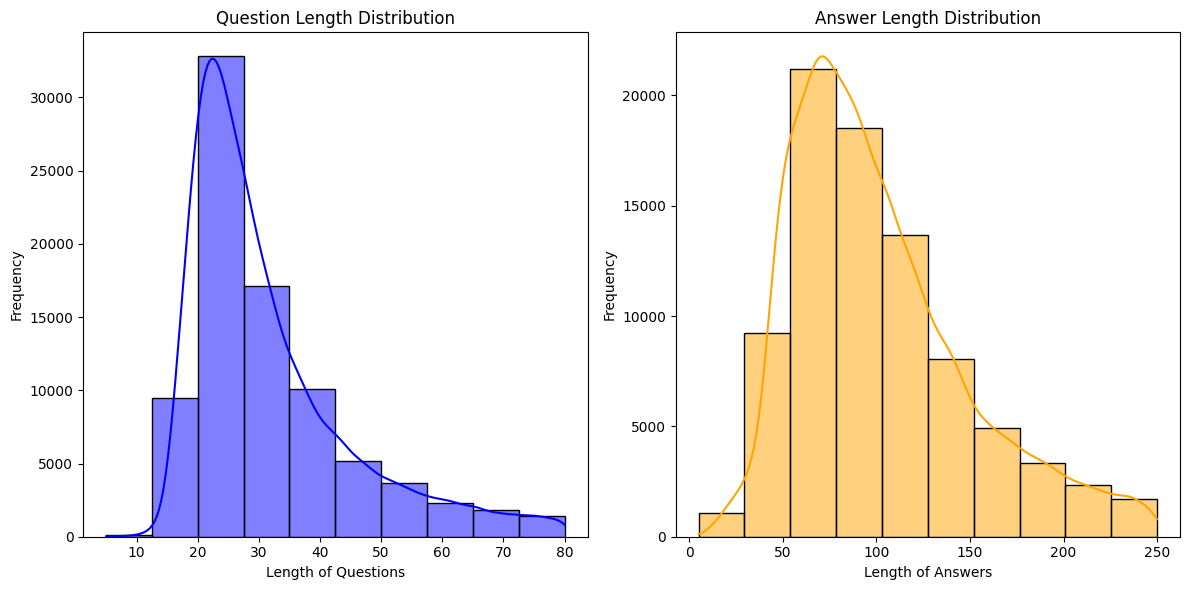

In [16]:
# 문자열 길이 계산
df['Question_length'] = df['Question'].str.len()
df['Answer_length'] = df['Answer'].str.len()

# Question 열 통계
question_mean = df['Question_length'].mean()
question_max = df['Question_length'].max()
question_min = df['Question_length'].min()

# Answer 열 통계
answer_mean = df['Answer_length'].mean()
answer_max = df['Answer_length'].max()
answer_min = df['Answer_length'].min()

# 결과 출력
print("Question 열 길이 통계:")
print(f"평균 길이: {question_mean:.2f}")
print(f"최대 길이: {question_max}")
print(f"최소 길이: {question_min}")

print("\nAnswer 열 길이 통계:")
print(f"평균 길이: {answer_mean:.2f}")
print(f"최대 길이: {answer_max}")
print(f"최소 길이: {answer_min}")

# 시각화
plt.figure(figsize=(12, 6))

# Question 길이 시각화
plt.subplot(1, 2, 1)
sns.histplot(df['Question_length'], bins=10, color='blue', kde=True)
plt.title('Question Length Distribution')
plt.xlabel('Length of Questions')
plt.ylabel('Frequency')

# Answer 길이 시각화
plt.subplot(1, 2, 2)
sns.histplot(df['Answer_length'], bins=10, color='orange', kde=True)
plt.title('Answer Length Distribution')
plt.xlabel('Length of Answers')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
print(len(df))

# 최대 및 최소 길이 설정
min_question_length, max_question_length = 5, 80
min_answer_length, max_answer_length = 5, 250

# 조건에 맞지 않는 행 삭제
df = df[(df['Question'].str.len().between(min_question_length, max_question_length)) &
        (df['Answer'].str.len().between(min_answer_length, max_answer_length))]
print(len(df))

97868
84099


In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds

c:\Users\Kimdongjun\anaconda3\envs\trans\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
questions = []
for question in df['Question']:
    questions.append(question)
answers = []
for answer in df['Answer']:
    answers.append(answer)

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size = 2**14
)

In [19]:
tokenizer.save_to_file('tokenizer')
# tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('tokenizer')
def tokenized_and_padding(questions, answers):
  temp_question = []
  temp_answer = []
  
  for (question, answer) in zip(questions, answers):
    token_question = tokenizer.encode(question)
    token_answer = tokenizer.encode(answer)
    
    temp_question.append(token_question)
    temp_answer.append(token_answer)
    
  temp_question = tf.keras.preprocessing.sequence.pad_sequences(
    temp_question, padding='post'
  )
  temp_answer = tf.keras.preprocessing.sequence.pad_sequences(
    temp_answer, padding='post'
  )
  
  return temp_question, temp_answer

temp_question, temp_answer = tokenized_and_padding(questions, answers)

In [20]:
print(temp_question[:3])
print(temp_answer[:3])
print(max(len(q) for q in temp_question))
print(max(len(a) for a in temp_answer)) 

[[   79   140    72 16086     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [   79   140  6038     8 16086     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [   79  1262   140  1484 16086     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]]
[[  269  1995    82  1429   318  4260    20     1  1820   227  2131  1654
    740  4064   882    34   123   

In [21]:
# tokenizer.save_to_file('tokenizer')
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('tokenizer')

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size+1]
VOCAB_SIZE = tokenizer.vocab_size + 2

QUE_MAX_LENGTH = 48
ANS_MAX_LENGTH = 138

def tokenized_and_padding(questions, answers):
  tokenized_encoder_input, tokenized_decoder_input, tokenized_decoder_output = [], [], []
  
  for (question, answer) in zip(questions, answers):
    encoder_input = tokenizer.encode(question)
    decoder_input = START_TOKEN + tokenizer.encode(answer)
    decoder_output = tokenizer.encode(answer) + END_TOKEN
    
    tokenized_encoder_input.append(encoder_input)
    tokenized_decoder_input.append(decoder_input)
    tokenized_decoder_output.append(decoder_output)
    
  tokenized_encoder_input = tf.keras.preprocessing.sequence.pad_sequences(
    tokenized_encoder_input, maxlen=QUE_MAX_LENGTH, padding='post'
  )
  tokenized_decoder_input = tf.keras.preprocessing.sequence.pad_sequences(
    tokenized_decoder_input, maxlen=ANS_MAX_LENGTH, padding='post'
  )
  tokenized_decoder_output = tf.keras.preprocessing.sequence.pad_sequences(
    tokenized_decoder_output, maxlen=ANS_MAX_LENGTH, padding='post'
  )
  
  return tokenized_encoder_input, tokenized_decoder_input, tokenized_decoder_output

tokenized_encoder_input, tokenized_decoder_input, tokenized_decoder_output = tokenized_and_padding(questions, answers)

In [22]:
print(tokenized_encoder_input[:3])
print(tokenized_decoder_input[:3])
print(tokenized_decoder_output[:3])
print(max(len(q) for q in tokenized_encoder_input))
print(max(len(a) for a in tokenized_decoder_input)) 
print(max(len(a) for a in tokenized_decoder_output)) 

[[   79   140    72 16086     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [   79   140  6038     8 16086     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [   79  1262   140  1484 16086     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]]
[[16296   269  1995    82  1429   318  4260    20     1  1820   227  2131
   1654   740  4064   882    34   

In [23]:
import random

print(tokenized_encoder_input[1])
print(tokenized_decoder_input[1])
print(tokenized_decoder_output[1])

qa_pairs = list(zip(tokenized_encoder_input, tokenized_decoder_input, tokenized_decoder_output))
random.shuffle(qa_pairs)
tokenized_encoder_input, tokenized_decoder_input, tokenized_decoder_output= zip(*qa_pairs)

tokenized_encoder_input = list(tokenized_encoder_input)
tokenized_decoder_input = list(tokenized_decoder_input)
tokenized_decoder_output = list(tokenized_decoder_output)

print(tokenized_encoder_input[1])
print(tokenized_decoder_input[1])
print(tokenized_decoder_output[1])

[   79   140  6038     8 16086     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0]
[16296  2257   451  7209   477  1541   199     1   126   492   453   452
  1177    60  3860  5929   305  3901   894  1247   241 16086     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0  

In [25]:
import numpy as np

print(round(len(df)/100))
split_index = round(len(df)/100)

encoder_input_train = tokenized_encoder_input[:-split_index]
decoder_input_train = tokenized_decoder_input[:-split_index]
decoder_target_train = tokenized_decoder_output[:-split_index]

encoder_input_test = tokenized_encoder_input[-split_index:]
decoder_input_test = tokenized_decoder_input[-split_index:]
decoder_target_test = tokenized_decoder_output[-split_index:]

encoder_input_train = np.array(encoder_input_train)
decoder_input_train = np.array(decoder_input_train)
decoder_target_train = np.array(decoder_target_train)

encoder_input_test = np.array(encoder_input_test)
decoder_input_test = np.array(decoder_input_test)
decoder_target_test = np.array(decoder_target_test)

print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

841
훈련 source 데이터의 크기 : (83258, 48)
훈련 target 데이터의 크기 : (83258, 138)
훈련 target 레이블의 크기 : (83258, 138)
테스트 source 데이터의 크기 : (841, 48)
테스트 target 데이터의 크기 : (841, 138)
테스트 target 레이블의 크기 : (841, 138)


In [26]:
np.save('encoder_input_train.npy', encoder_input_train)
np.save('decoder_input_train.npy', decoder_input_train)
np.save('decoder_target_train.npy', decoder_target_train)
np.save('encoder_input_test.npy', encoder_input_test)
np.save('decoder_input_test.npy', decoder_input_test)
np.save('decoder_target_test.npy', decoder_target_test)